In [1]:
from experiment_utils import generate_blob_data, add_noise, get_graph, visuallize_graph, denoise_experiment, compare_denoised_signal
import numpy as np
from sklearn.datasets import make_blobs
## the output seems to be too much for this notebook, disabling tqdm.
from tqdm import tqdm
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True) 

In [2]:
np.random.seed(32)
adata = generate_blob_data(n_cells=1000, n_genes=500, n_clusters=5, cluster_std=8.0, center_box=(-5, 5))

2023-04-25 17:46:02.567025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 17:46:02.672043: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:108: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']


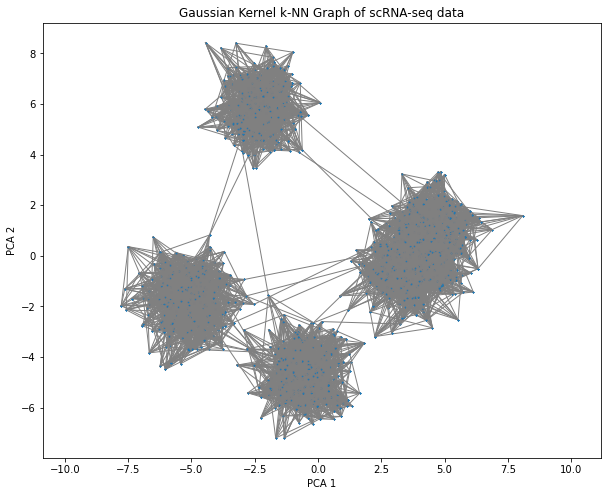

In [3]:
visuallize_graph(get_graph(adata))

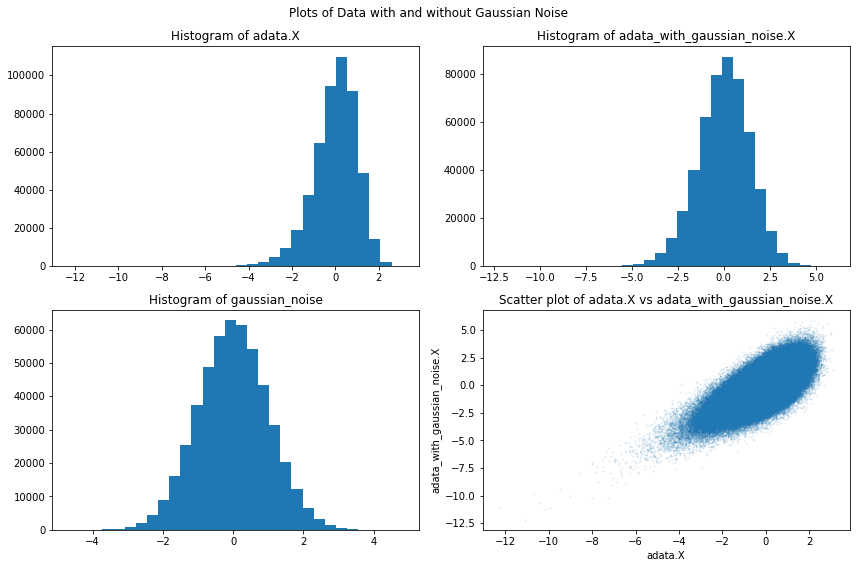

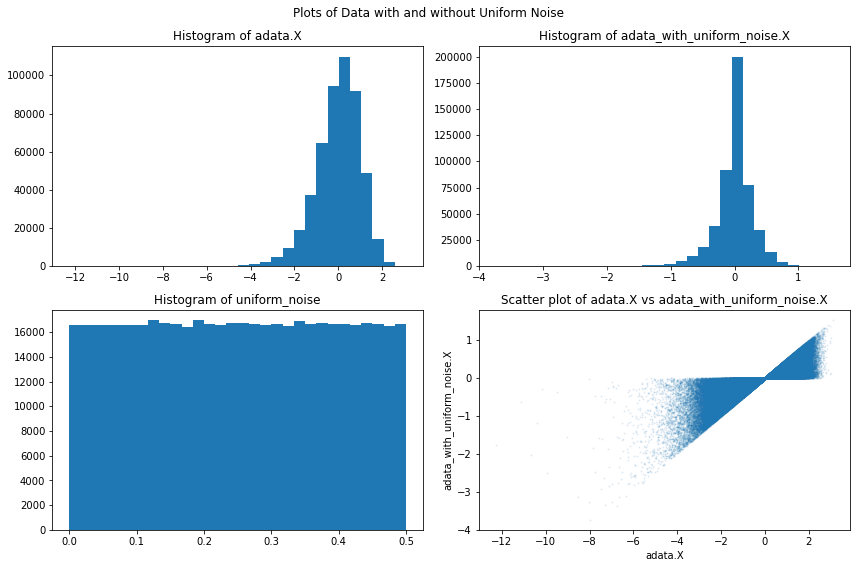

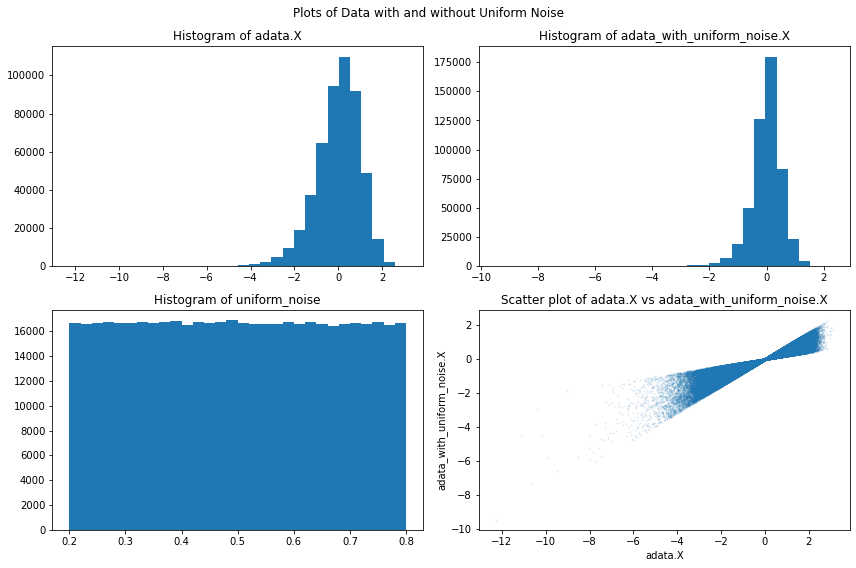

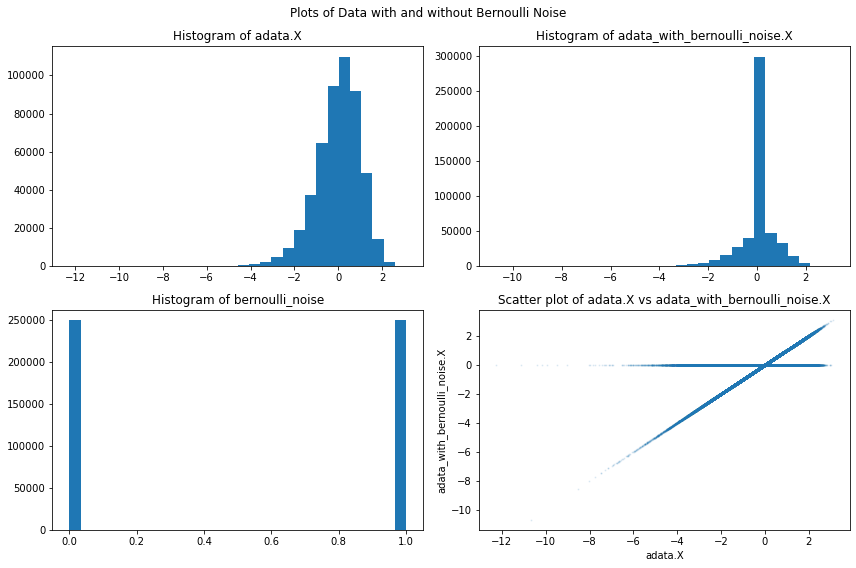

In [4]:
adata_gaussian = add_noise(adata, noise_type='gaussian', mean=0, std=1, noise_scale=1)
adata_uniform1 = add_noise(adata, noise_type='uniform', low=0, high=0.5)
adata_uniform2 = add_noise(adata, noise_type='uniform', low=0.2, high=0.8)
adata_bernoulli = add_noise(adata, noise_type='bernoulli', probability=0.5)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:108: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']
2023-04-25 17:46:15,835:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


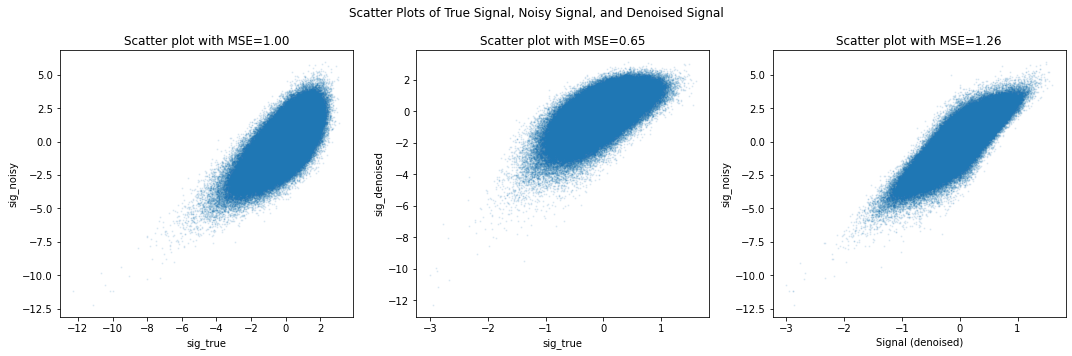

In [5]:
pygsp_graph = get_graph(adata_gaussian)
sig_denoised_gaussian = denoise_experiment(pygsp_graph, adata_gaussian.X, 'gaussian')
mse_dict_gaussian = compare_denoised_signal(adata.X, adata_gaussian.X, sig_denoised_gaussian)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:108: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']


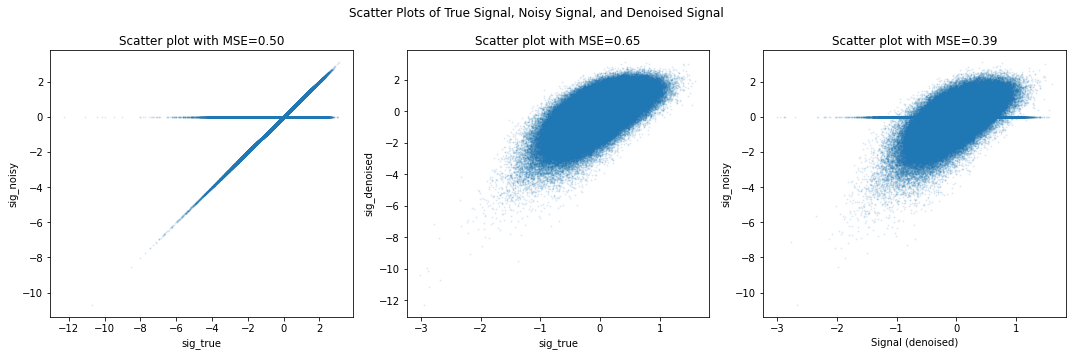

In [6]:
pygsp_graph = get_graph(adata_bernoulli)
sig_denoised_bernoulli = denoise_experiment(pygsp_graph, adata_bernoulli.X, 'bernoulli')
mse_dict_bernoulli = compare_denoised_signal(adata.X, adata_bernoulli.X, sig_denoised_gaussian)

In [7]:
mse_dict_gaussian

{'MSE noisy': 0.9990860737368567,
 'MSE denoised': 0.6457461392230482,
 'MSE denoised vs noisy': 1.2553072406190109}

In [8]:
mse_dict_bernoulli

{'MSE noisy': 0.5011076547373073,
 'MSE denoised': 0.6457461392230482,
 'MSE denoised vs noisy': 0.39012111101327496}

In [9]:
pygsp_graph = get_graph(adata_uniform1)
sig_denoised_uniform1 = denoise_experiment(pygsp_graph, adata_uniform1.X, 'uniform')
mse_dict_uniform1 = compare_denoised_signal(adata.X, adata_uniform1.X, sig_denoised_gaussian)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:108: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']


67155.43706529513
Truth unknown


TypeError: buffer format not supported

In [ ]:
pygsp_graph = get_graph(adata_uniform2)
sig_denoised_uniform2 = denoise_experiment(pygsp_graph, adata_uniform2.X, 'uniform')
mse_dict_uniform2 = compare_denoised_signal(adata.X, adata_uniform2.X, sig_denoised_gaussian)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:107: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']


-51227.61575768388
Truth unknown


TypeError: buffer format not supported